In [1]:
import json, math, os, re, requests, time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load Dataset

In [2]:
# Navigate to the directory containing final_dataset.csv
os.chdir('C:/Users/Mindy/Documents/BT4222/Group Project/Primary Datasets/')

In [3]:
[item for item in os.listdir() if '.csv' in item or '.xlsx' in item or '.shp' in item]

['Completion_Date_Manual_Fill.csv',
 'crime cases_dataset.csv',
 'final_dataset(old).csv',
 'final_dataset.csv',
 'general-information-of-schools.csv',
 'hdb_dataset(old).csv',
 'hdb_dataset.csv',
 'kindergarten_dataset.csv',
 'mrtsg.csv',
 'police centre_dataset.xlsx',
 'preschool_dataset.csv',
 'property_price_index.csv']

In [4]:
data = pd.read_csv('final_dataset.csv')
data.head()

,Area (SQM),BLK_NO,BUILDING,Floor Number,POSTAL,Planning Area,Planning Region,Postal Code,Property Type,ROAD_NAME,Sale Date,Transacted Price ($),Unit Price ($ PSM),PPI,Police Centre,Average Cases Per Year,Number of Preschools and Kindergartens,Nearest Preschool/Kindergarten,Number of Primary Schools,Nearest Primary School,num_stations_1km,nearest_station_distance,Remaining Lease,Age Sold,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Choa Chu Kang,Clementi,Downtown Core,Geylang,Hougang,Jurong East,Jurong West,Kallang,Mandai,Marine Parade,Museum,Newton,Novena,Orchard,Outram,Pasir Ris,Punggol,Queenstown,River Valley,Rochor,Sembawang,Sengkang,Serangoon,Singapore River,Southern Islands,Tampines,Tanglin,Toa Payoh,Woodlands,Yishun,BLUE,BROWN,GREEN,LRT,PURPLE,RED,YELLOW
0,95.0,5,EUPHONY GARDENS,1.0,759151,Mandai,North Region,759151,Condominium,JALAN MATA AYER,2010-01-01,600000.0,6316.0,124.3,Yishun South NPC,33,22,122.126234,7,705.752731,0,1207.822015,76.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,138.0,42,CARIBBEAN AT KEPPEL BAY,1.0,98656,Bukit Merah,Central Region,98656,Condominium,KEPPEL BAY DRIVE,2010-01-02,1909000.0,13833.0,124.3,Bukit Merah West NPC,58,9,284.288688,3,1233.947139,2,701.658174,77.0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,99.0,7,ASTOR GREEN,10.0,597592,Bukit Timah,Central Region,597592,Condominium,PINE GROVE,2010-01-03,890000.0,8990.0,124.3,Clementi NPC,50,8,252.918086,5,863.372748,1,816.818037,69.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,111.0,81,ORCHID PARK CONDOMINIUM,6.0,768445,Yishun,North Region,768445,Condominium,YISHUN STREET 81,2010-01-03,700000.0,6306.0,124.3,Yishun South NPC,33,24,145.388501,5,509.516515,1,501.364218,69.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,122.0,12,CARIBBEAN AT KEPPEL BAY,10.0,98641,Bukit Merah,Central Region,98641,Condominium,KEPPEL BAY DRIVE,2010-01-04,1700000.0,13934.0,124.3,Bukit Merah West NPC,58,6,328.855554,3,1258.241586,2,554.491114,77.0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [5]:
data.dtypes

Area (SQM)                                float64
BLK_NO                                     object
BUILDING                                   object
Floor Number                              float64
POSTAL                                      int64
Planning Area                              object
Planning Region                            object
Postal Code                                 int64
Property Type                              object
ROAD_NAME                                  object
Sale Date                                  object
Transacted Price ($)                      float64
Unit Price ($ PSM)                        float64
PPI                                       float64
Police Centre                              object
Average Cases Per Year                      int64
Number of Preschools and Kindergartens      int64
Nearest Preschool/Kindergarten            float64
Number of Primary Schools                   int64
Nearest Primary School                    float64


# Data Preparation

In [6]:
# Covert list that has been saved as string back into a list
def station_str_to_list(station_list):
    
    station_list = station_list[2:]
    station_list = station_list[:-2]
    station_list = station_list.split("', '")
    
    return station_list

data['stations_1km'] = data['stations_1km'].apply(station_str_to_list)

In [7]:
data[['stations_1km']].dtypes

stations_1km    object
dtype: object

In [44]:
def count_station_type(stations):
    mrt_count = 0
    lrt_count = 0
    for station in stations: 
        
        if ('MRT' in station): 
            mrt_count += 1
        elif ('LRT' in station): 
            lrt_count += 1
            
    return mrt_count, lrt_count

data['num_mrt_1km'], data['num_lrt_1km'] = zip(*data['stations_1km'].apply(count_station_type))

# GeoDataFrames

In [12]:
import geopandas
# Converting listings from DataFrame object into GeoDataFrame
gdf = geopandas.GeoDataFrame(data, 
                             geometry=geopandas.points_from_xy(data['LONGITUDE'], data['LATITUDE']),
                             crs={"init":"EPSG:4326"})

C:\Users\Mindy\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
train_stations = pd.read_csv('mrtsg.csv')

# Converting train_stations from DataFrame object in GeoDataFrame
train_station_gdf = geopandas.GeoDataFrame(train_stations, 
                                           geometry=geopandas.points_from_xy(train_stations['Longitude'], train_stations['Latitude']),
                                           crs={"init":"EPSG:4326"})

<AxesSubplot:>

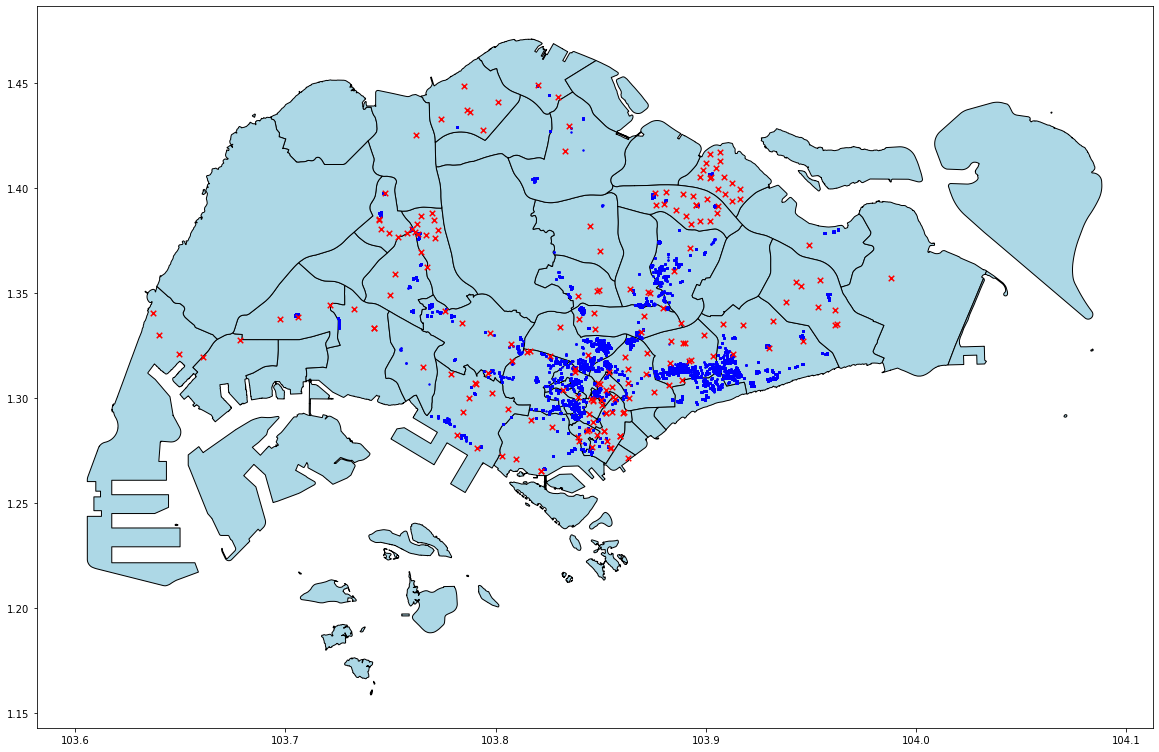

In [43]:
import matplotlib.pyplot as plt

sg_map = geopandas.read_file("master-plan-2014-planning-area-boundary-no-sea\master-plan-2014-planning-area-boundary-no-sea-shp\MP14_PLNG_AREA_NO_SEA_PL.shp")
sg_map = sg_map.to_crs(epsg=4326) 
fig, ax = plt.subplots(figsize=(20,20))
sg_map.plot(ax = ax, color = 'lightblue', edgecolor = 'black')

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

gdf.plot(ax = ax, marker = "o", color = 'blue', markersize = 2)
train_station_gdf.plot(ax=ax, marker='x', color='red', markersize=30)

# There is an uneven distribution of listings with most centered around the Central Region

# Studying the Different Regions

<AxesSubplot:>

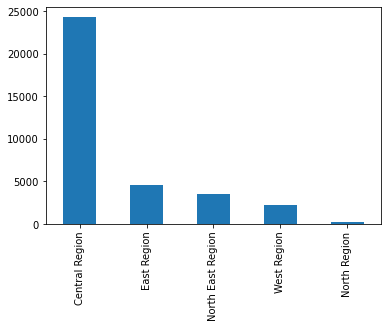

In [46]:
# There has been an overwhelming number of sales within the Central Region
data['Planning Region'].value_counts().plot(kind = 'bar')

## Unit Price By Planning Region

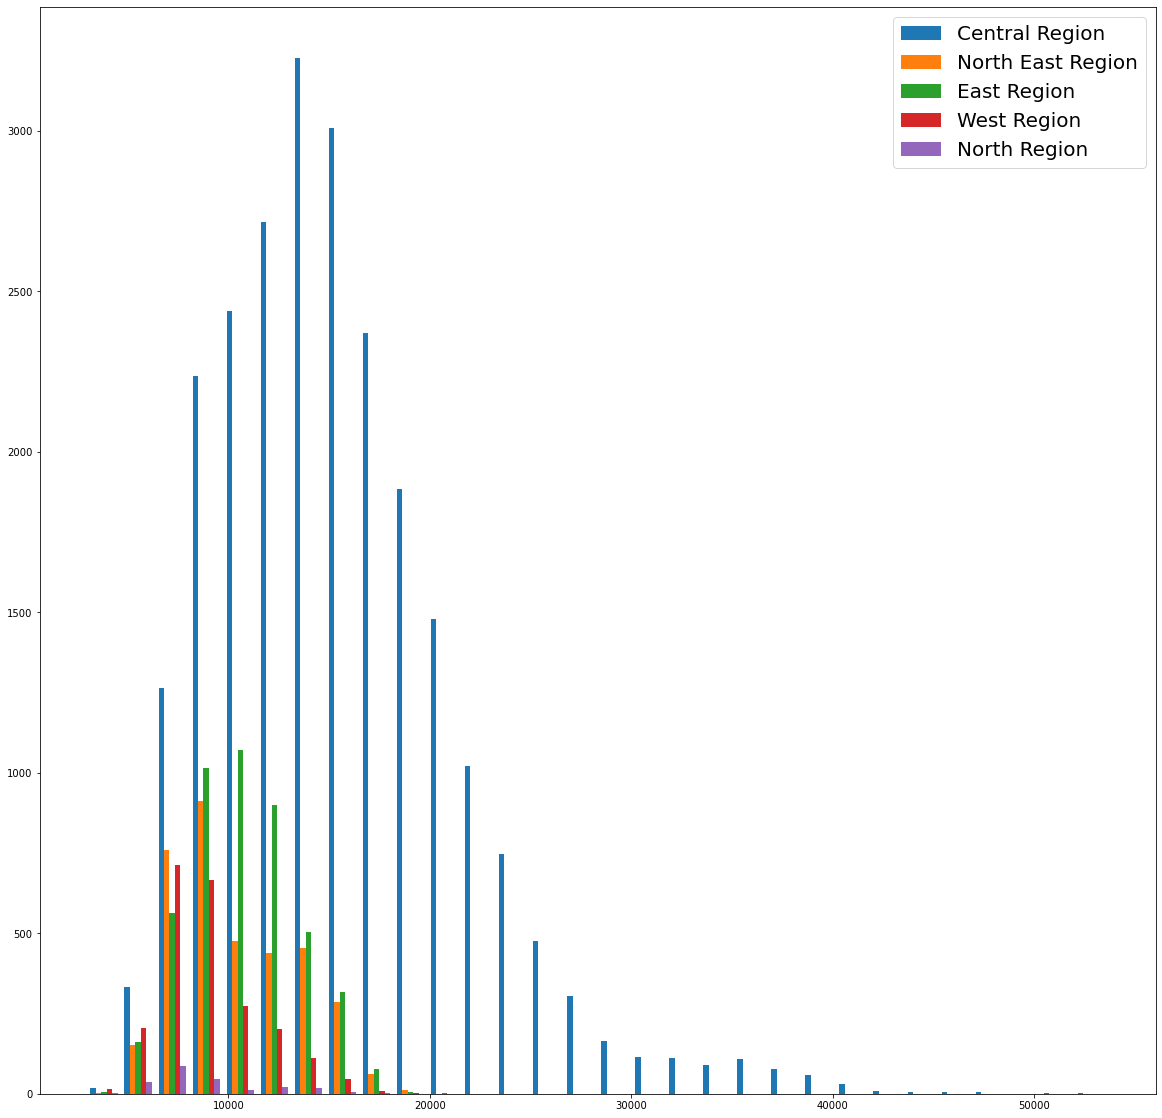

In [68]:
regions = data['Planning Region'].unique()
plt.figure(figsize=(20,20))
plt.hist([data.loc[data['Planning Region'] == x, 'Unit Price ($ PSM)'] for x in regions], label=regions, bins = 30)
plt.legend(prop={'size': 20})

# Unit Price is quite evenly distributed across regions
# With the exception of the Central Region that has a longer right tail

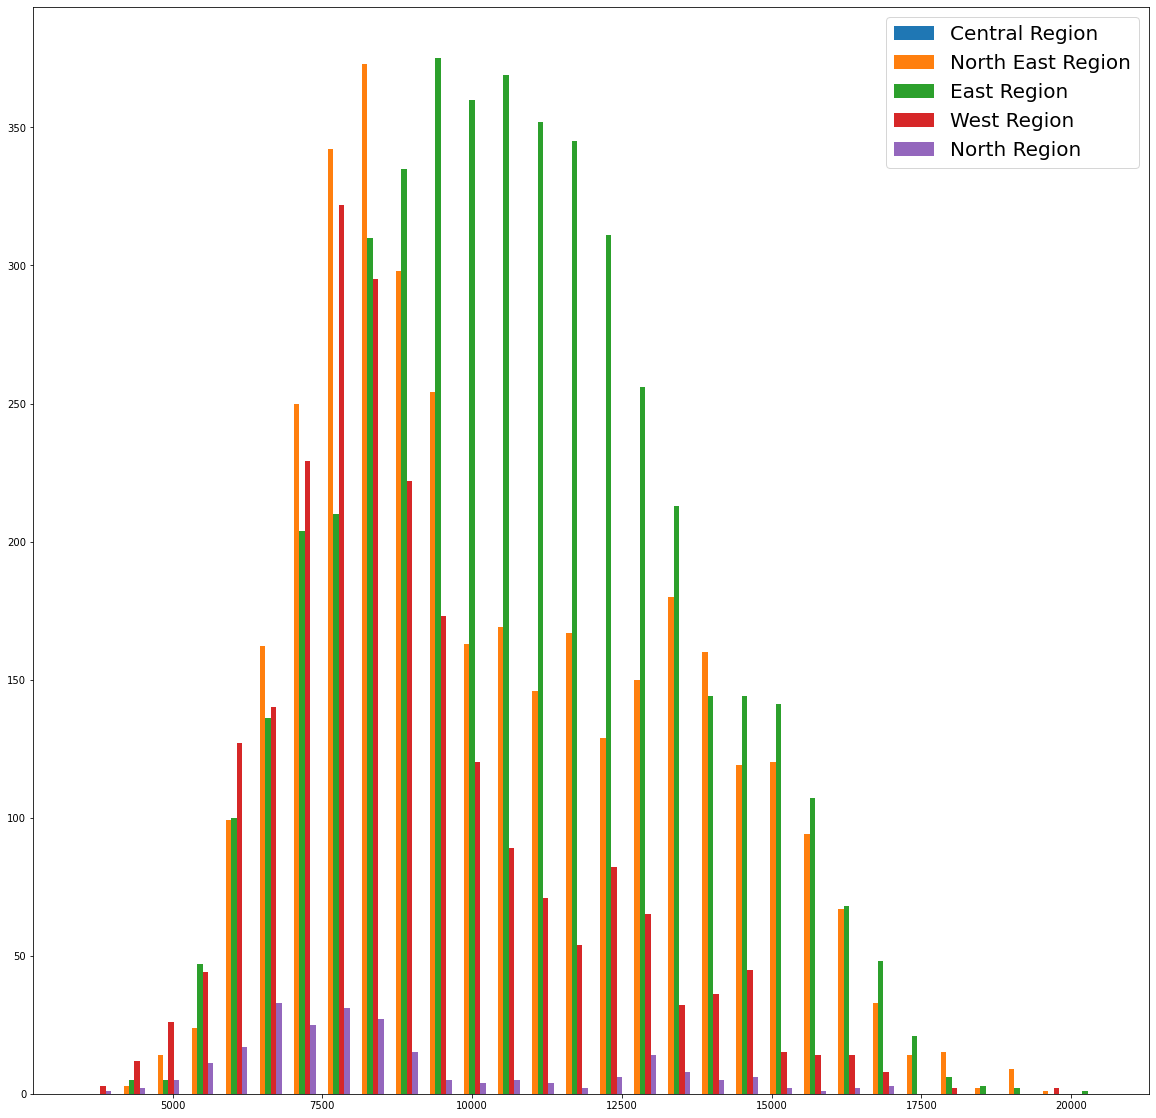

In [175]:
regions = data['Planning Region'].unique()
plt.figure(figsize=(20,20))
plt.hist([data[data['Planning Region'] != 'Central Region'].loc[data['Planning Region'] == x, 'Unit Price ($ PSM)'] for x in regions], label=regions, bins = 30)
plt.legend(prop={'size': 20})

<AxesSubplot:title={'center':'Unit Price ($ PSM)'}, xlabel='[Planning Region]'>

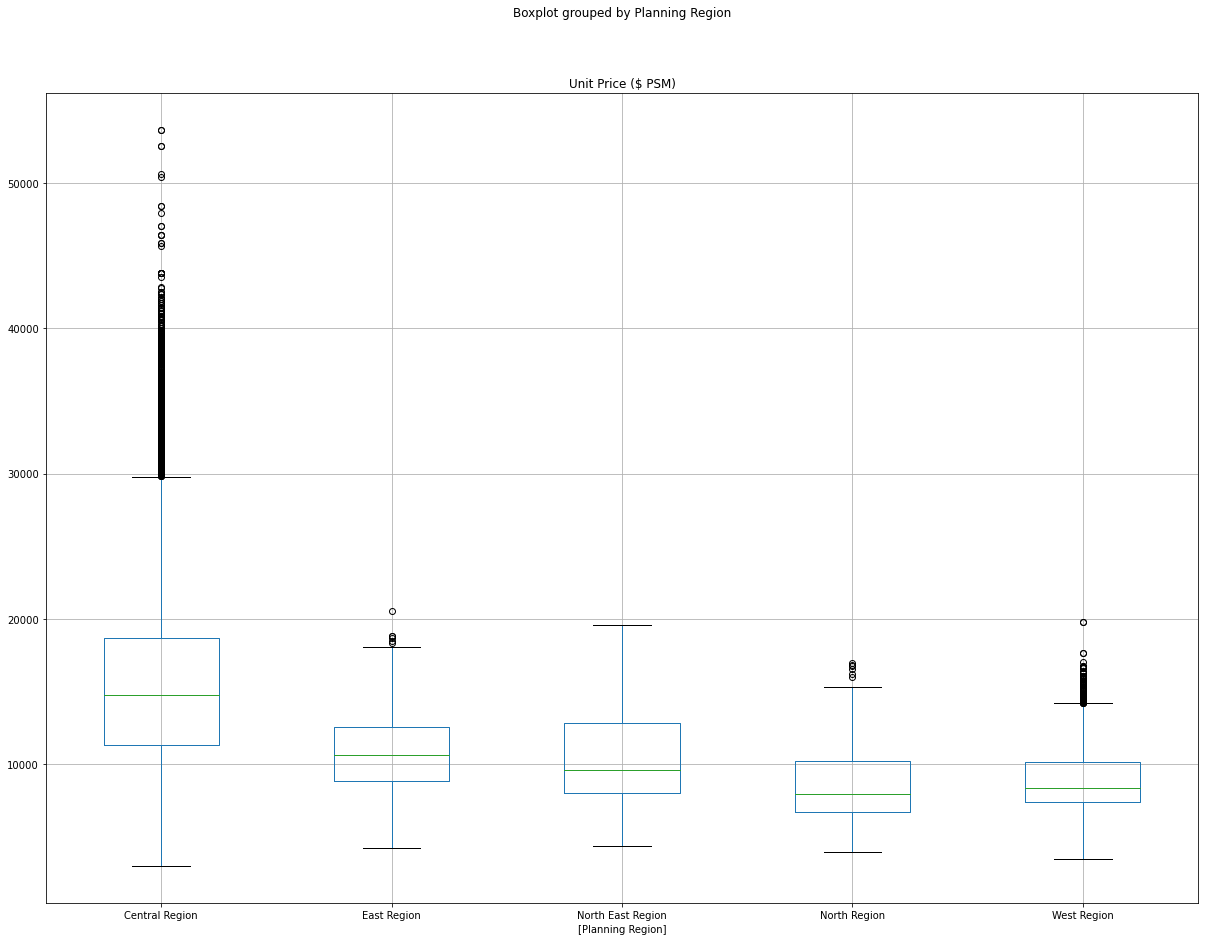

In [176]:
data.boxplot(column = 'Unit Price ($ PSM)', by = ['Planning Region'], figsize = (20,15))

## Transacted Price by Planning Region

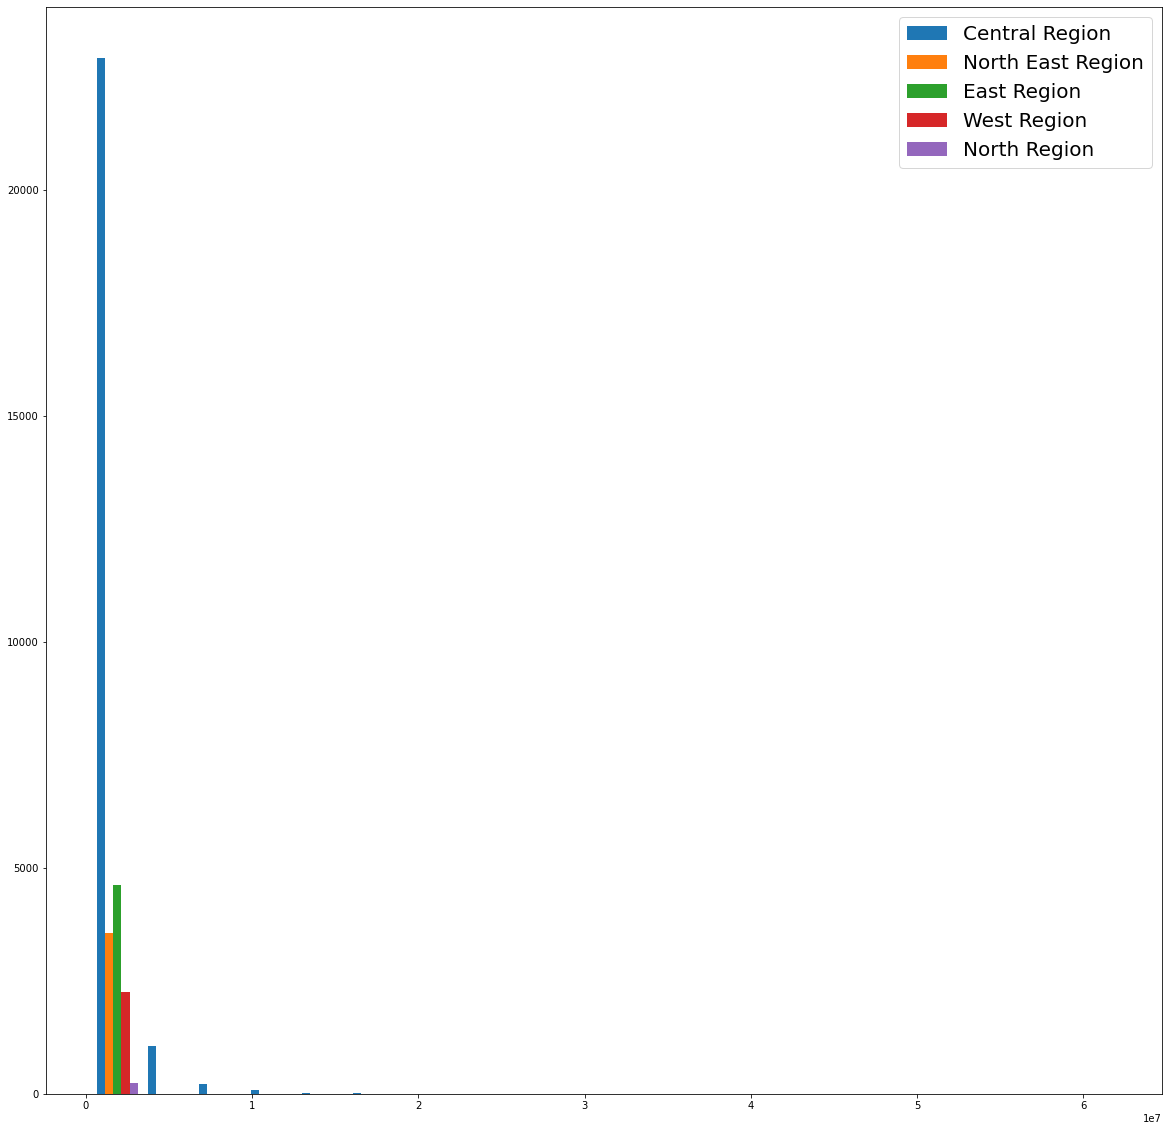

In [73]:
regions = data['Planning Region'].unique()
plt.figure(figsize=(20,20))
plt.hist([data.loc[data['Planning Region'] == x, 'Transacted Price ($)'] for x in regions], label=regions, bins = 20)
plt.legend(prop={'size': 20})

In [79]:
data['Transacted Price ($)'].describe()

count    3.495900e+04
mean     1.448249e+06
std      1.195393e+06
min      3.400000e+05
25%      8.800000e+05
50%      1.180000e+06
75%      1.600000e+06
max      6.200000e+07
Name: Transacted Price ($), dtype: float64

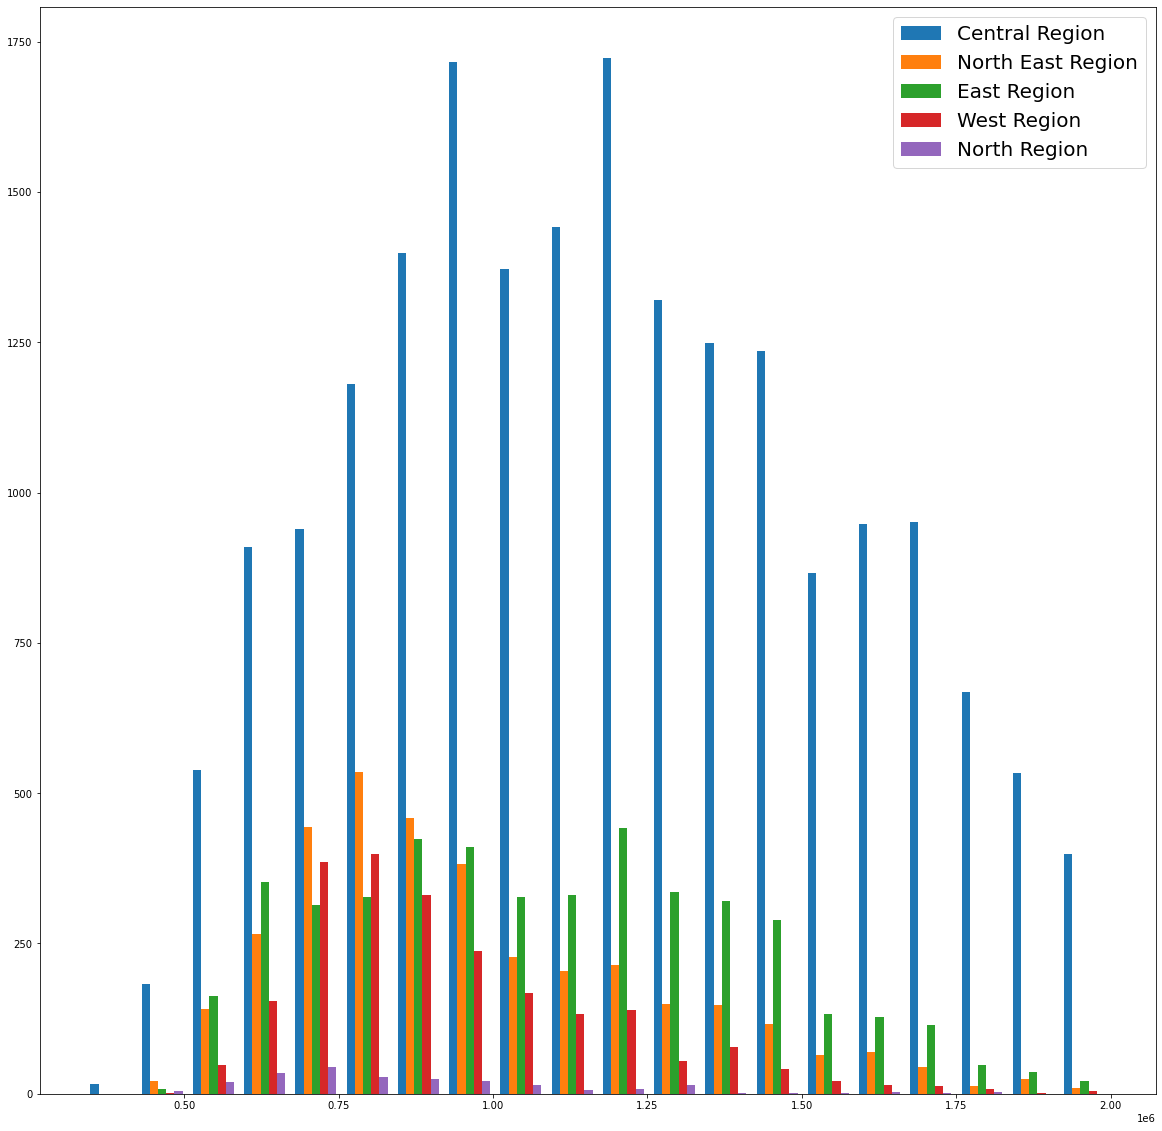

In [81]:
# Looking at listings that are non-outliers
regions = data['Planning Region'].unique()
plt.figure(figsize=(20,20))
plt.hist([data[data['Transacted Price ($)'] < 2000000].loc[data['Planning Region'] == x, 'Transacted Price ($)'] for x in regions], label=regions, bins = 20)
plt.legend(prop={'size': 20})

<AxesSubplot:title={'center':'Transacted Price ($)'}, xlabel='[Planning Region]'>

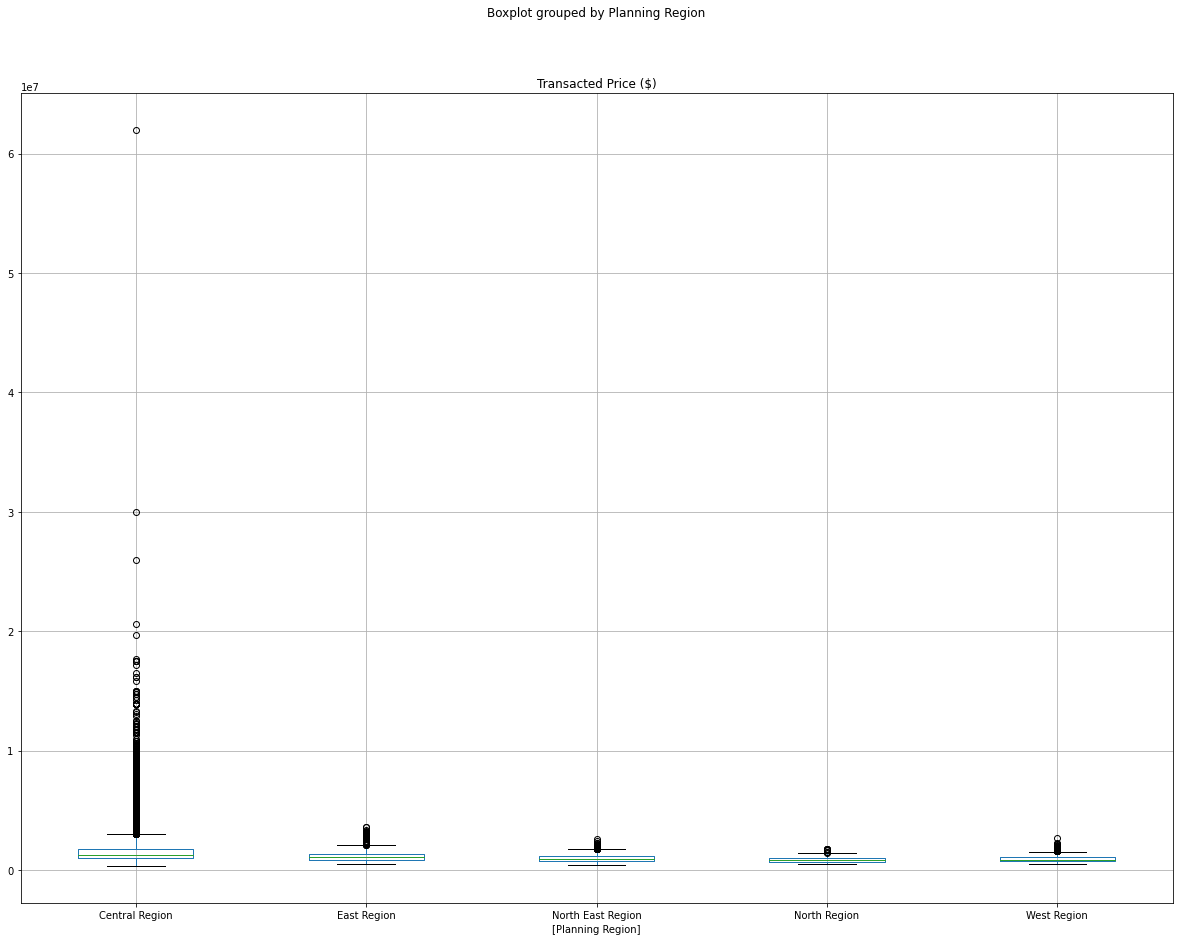

In [183]:
data.boxplot(column = 'Transacted Price ($)', by = ['Planning Region'], figsize = (20,15))

<AxesSubplot:title={'center':'Transacted Price ($)'}, xlabel='[Planning Region]'>

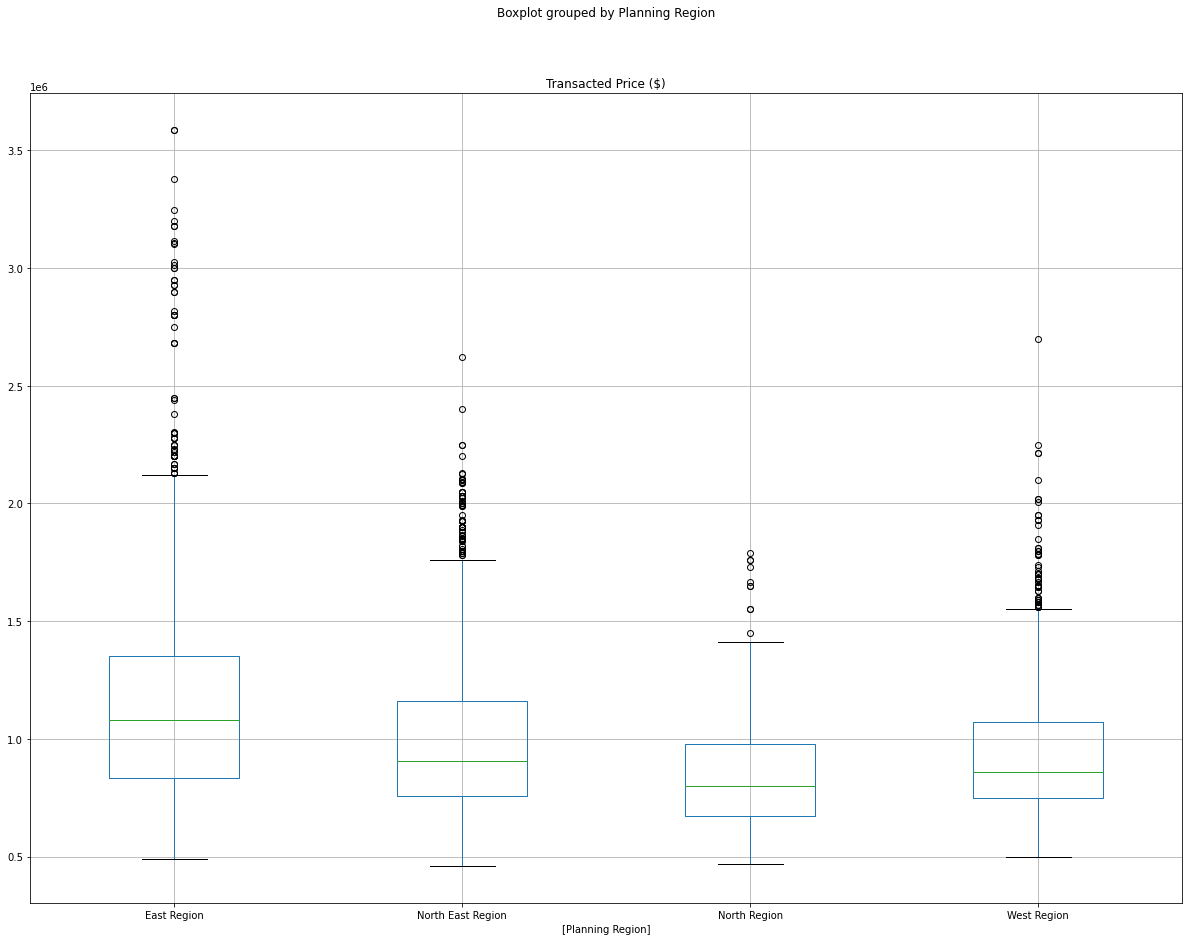

In [184]:
data[data['Planning Region'] != 'Central Region'].boxplot(column = 'Transacted Price ($)', by = ['Planning Region'], figsize = (20,15))

## Train Station Features

<AxesSubplot:title={'center':'nearest_station_distance'}, xlabel='[Planning Region]'>

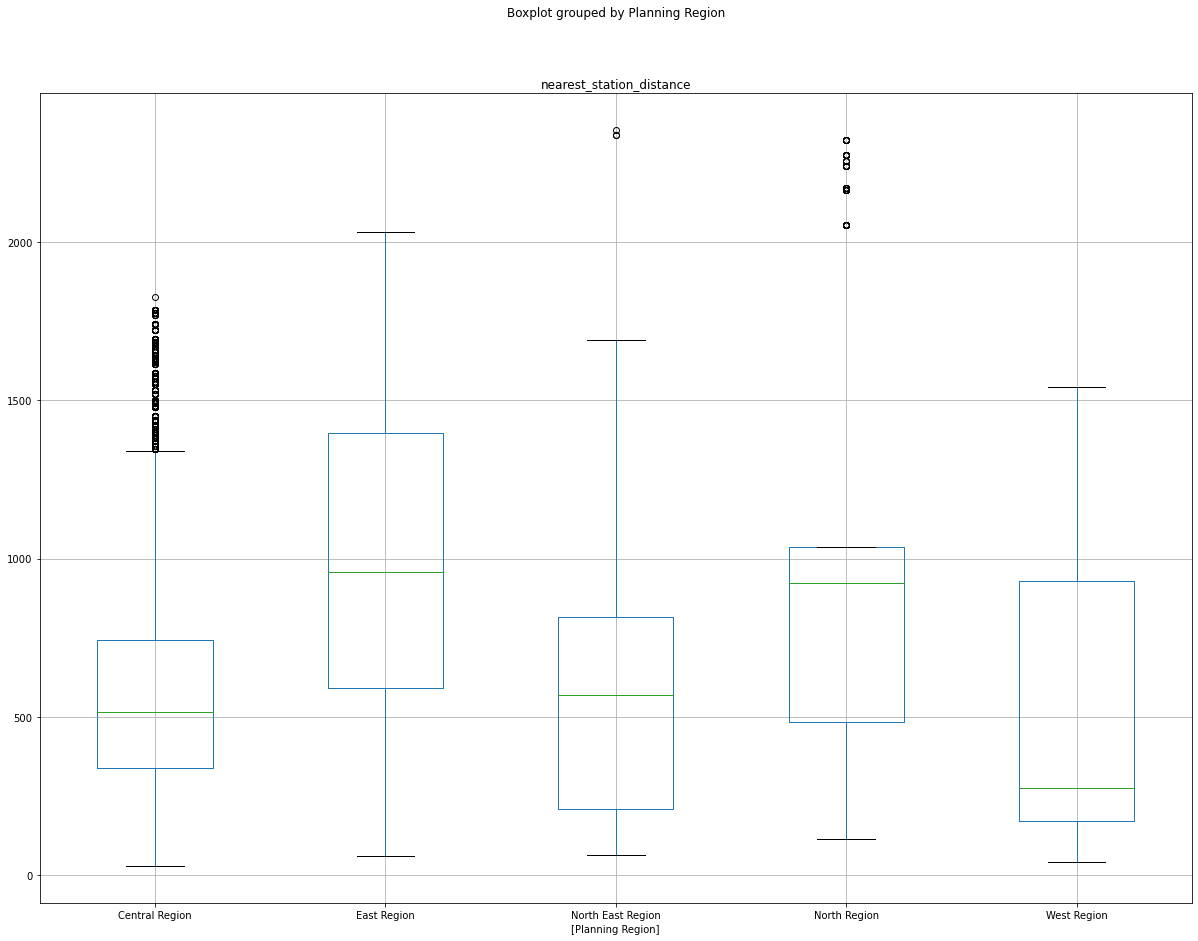

In [172]:
# Proximity to train stations across all regions
data.boxplot(column = 'nearest_station_distance', by = ['Planning Region'], figsize = (20,15))

# Spread of proximity to train stations is quite evenly distributed across regions

<AxesSubplot:title={'center':'num_stations_1km'}, xlabel='[Planning Region]'>

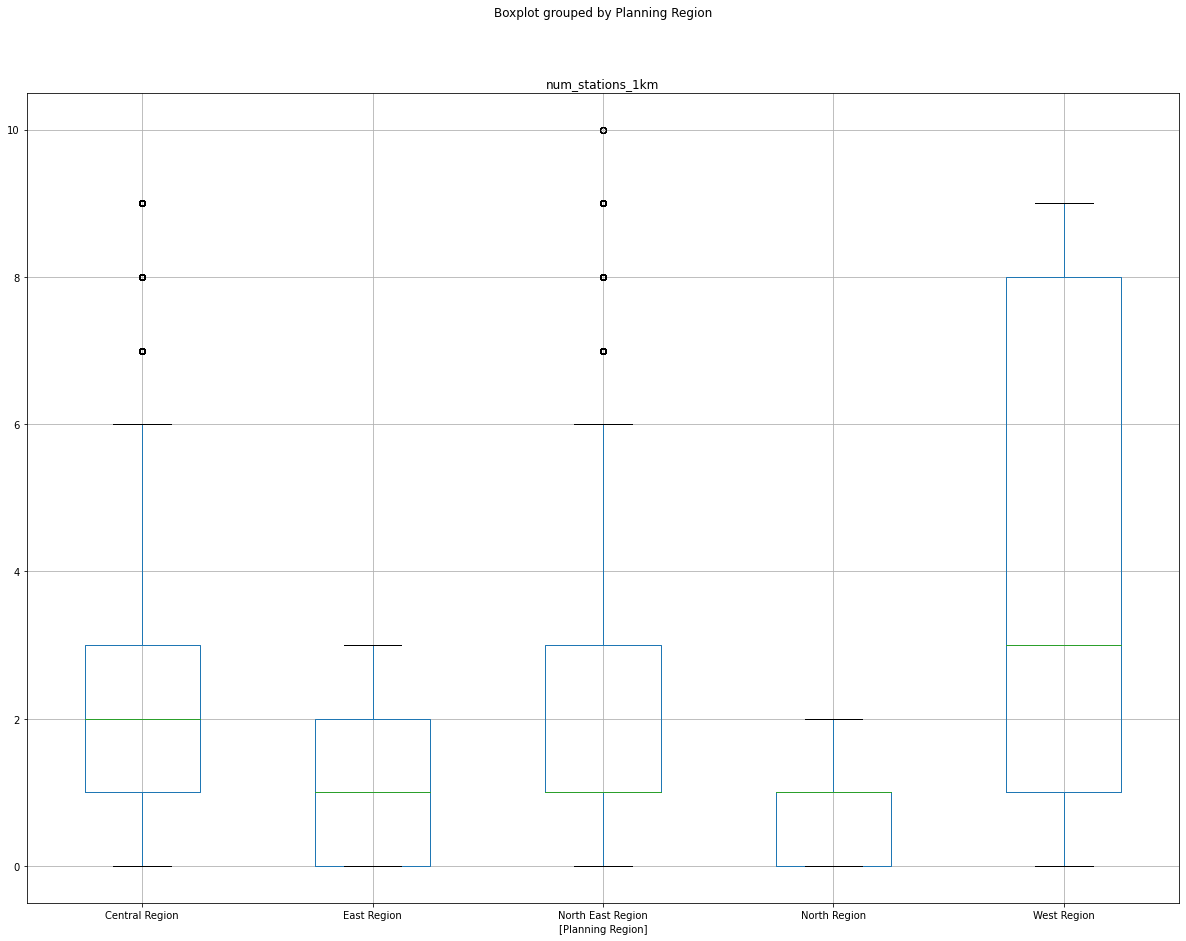

In [173]:
data.boxplot(column = 'num_stations_1km', by = ['Planning Region'], figsize = (20,15))

# West and North East regions inflated due to presence of LRTs 

<AxesSubplot:title={'center':'num_mrt_1km'}, xlabel='[Planning Region]'>

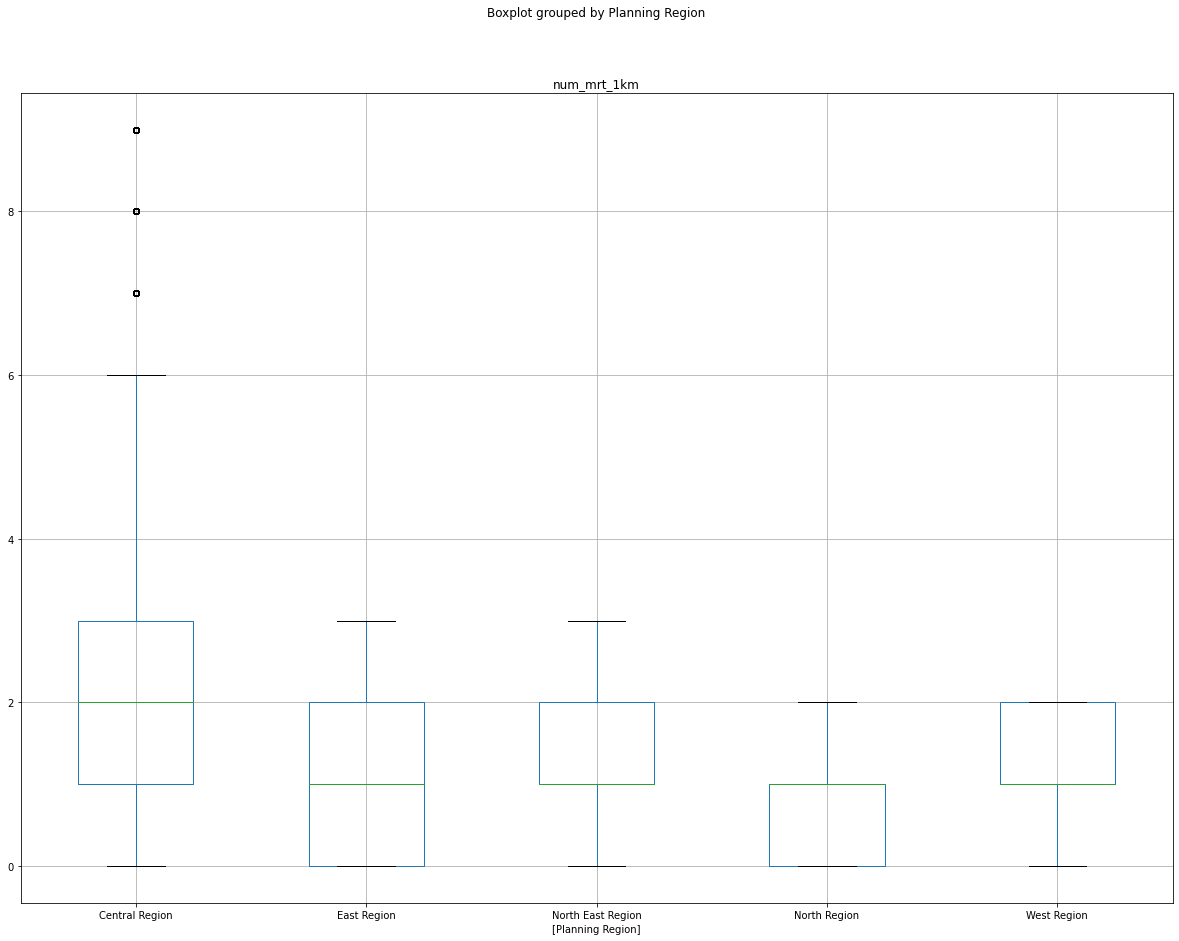

In [174]:
data.boxplot(column = 'num_mrt_1km', by = ['Planning Region'], figsize = (20,15))

# Central region is most heavily connected to the train network

# Correlation Matrices

In [140]:
# Function for plotting correlation matrix for the respective regions
def corr_matrix(region, ax, row, col):

    correlation_mat = data[data['Planning Region'] == region][['Transacted Price ($)', 'Unit Price ($ PSM)', 'Floor Number',
                                                                     'num_stations_1km', 'nearest_station_distance', 
                                                                     'num_mrt_1km', #'num_lrt_1km'
                                                              ]].corr()

    # Finding absolute correlation coefficient
    correlation_mat = correlation_mat.apply(abs)
    
    # Plotting
    return sns.heatmap(correlation_mat, annot = True, ax = ax[row, col])

def region_corr_matrix(region):
    
    print(region)

    correlation_mat = data[data['Planning Region'] == region][['Transacted Price ($)', 'Unit Price ($ PSM)', 'Floor Number',
                                                                     'num_stations_1km', 'nearest_station_distance', 
                                                                     'num_mrt_1km', #'num_lrt_1km'
                                                              ]].corr()

    # Finding absolute correlation coefficient
    correlation_mat = correlation_mat.apply(abs)
    
    # Plotting
    sns.heatmap(correlation_mat, annot = True)
    plt.plot()

<AxesSubplot:>

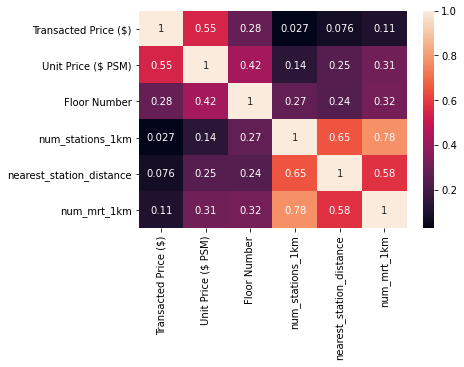

In [123]:
# Overall Correlation Matrix
correlation_mat = data[['Transacted Price ($)', 'Unit Price ($ PSM)', 'Floor Number',
                 'num_stations_1km', 'nearest_station_distance', 'num_mrt_1km', #'num_lrt_1km' 
                ]].corr()

# Finding absolute correlation coefficient
correlation_mat = correlation_mat.apply(abs)

# Plotting
sns.heatmap(correlation_mat, annot = True)

# Unit price seems like a better metric
# nearest_station_distance, num_mrt_1km

<AxesSubplot:xlabel='nearest_station_distance', ylabel='Unit Price ($ PSM)'>

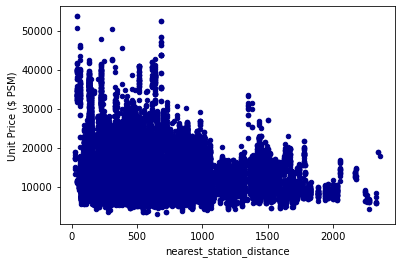

In [133]:
data.plot.scatter(x='nearest_station_distance',
                  y='Unit Price ($ PSM)',
                  c='DarkBlue')

<AxesSubplot:xlabel='num_mrt_1km', ylabel='Unit Price ($ PSM)'>

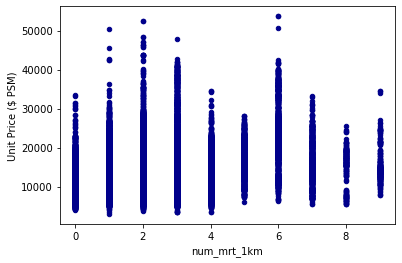

In [134]:
data.plot.scatter(x='num_mrt_1km',
                  y='Unit Price ($ PSM)',
                  c='DarkBlue')

<AxesSubplot:title={'center':'Unit Price ($ PSM)'}, xlabel='[num_mrt_1km]'>

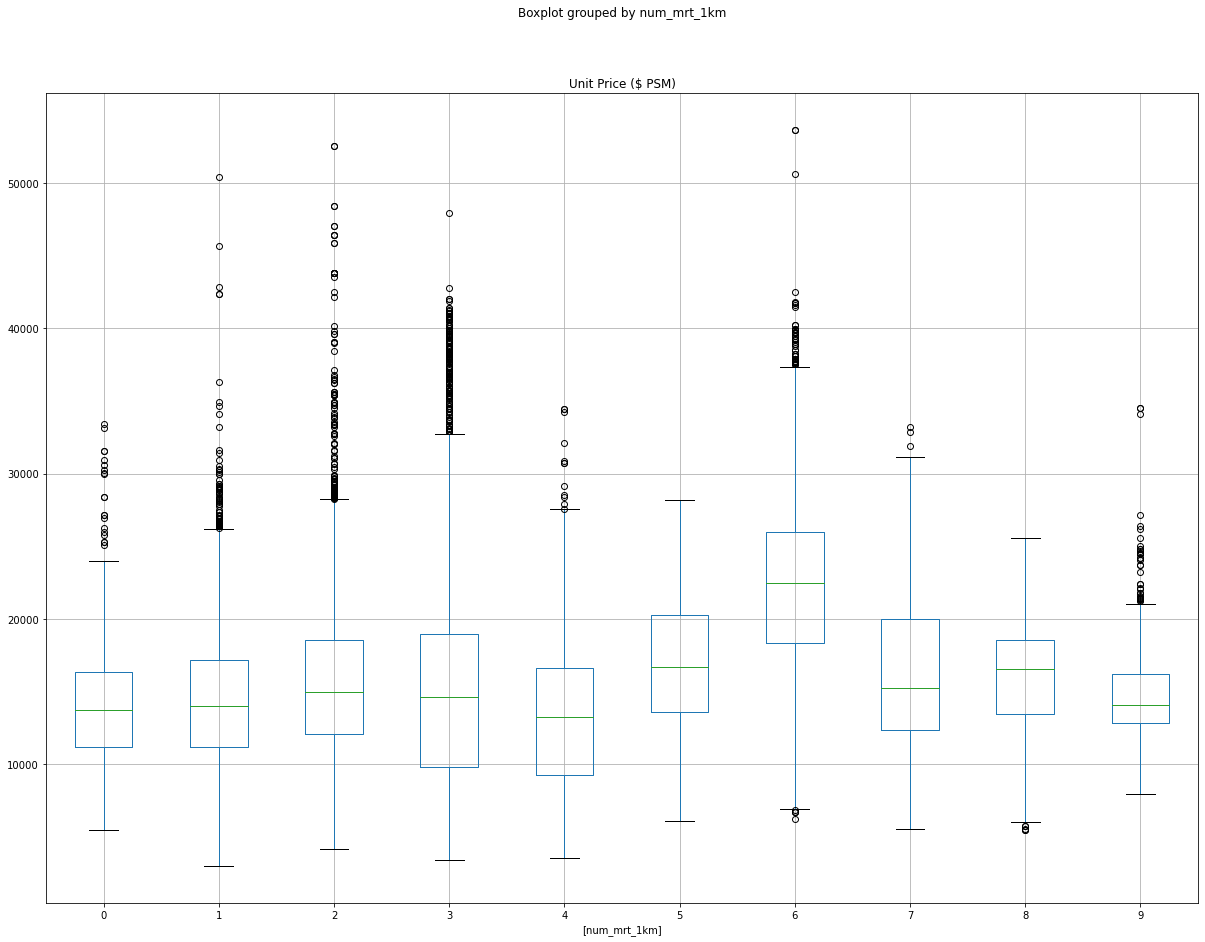

In [185]:
data[data['Planning Region'] == 'Central Region'].boxplot(column = 'Unit Price ($ PSM)', by = ['num_mrt_1km'], figsize = (20,15))

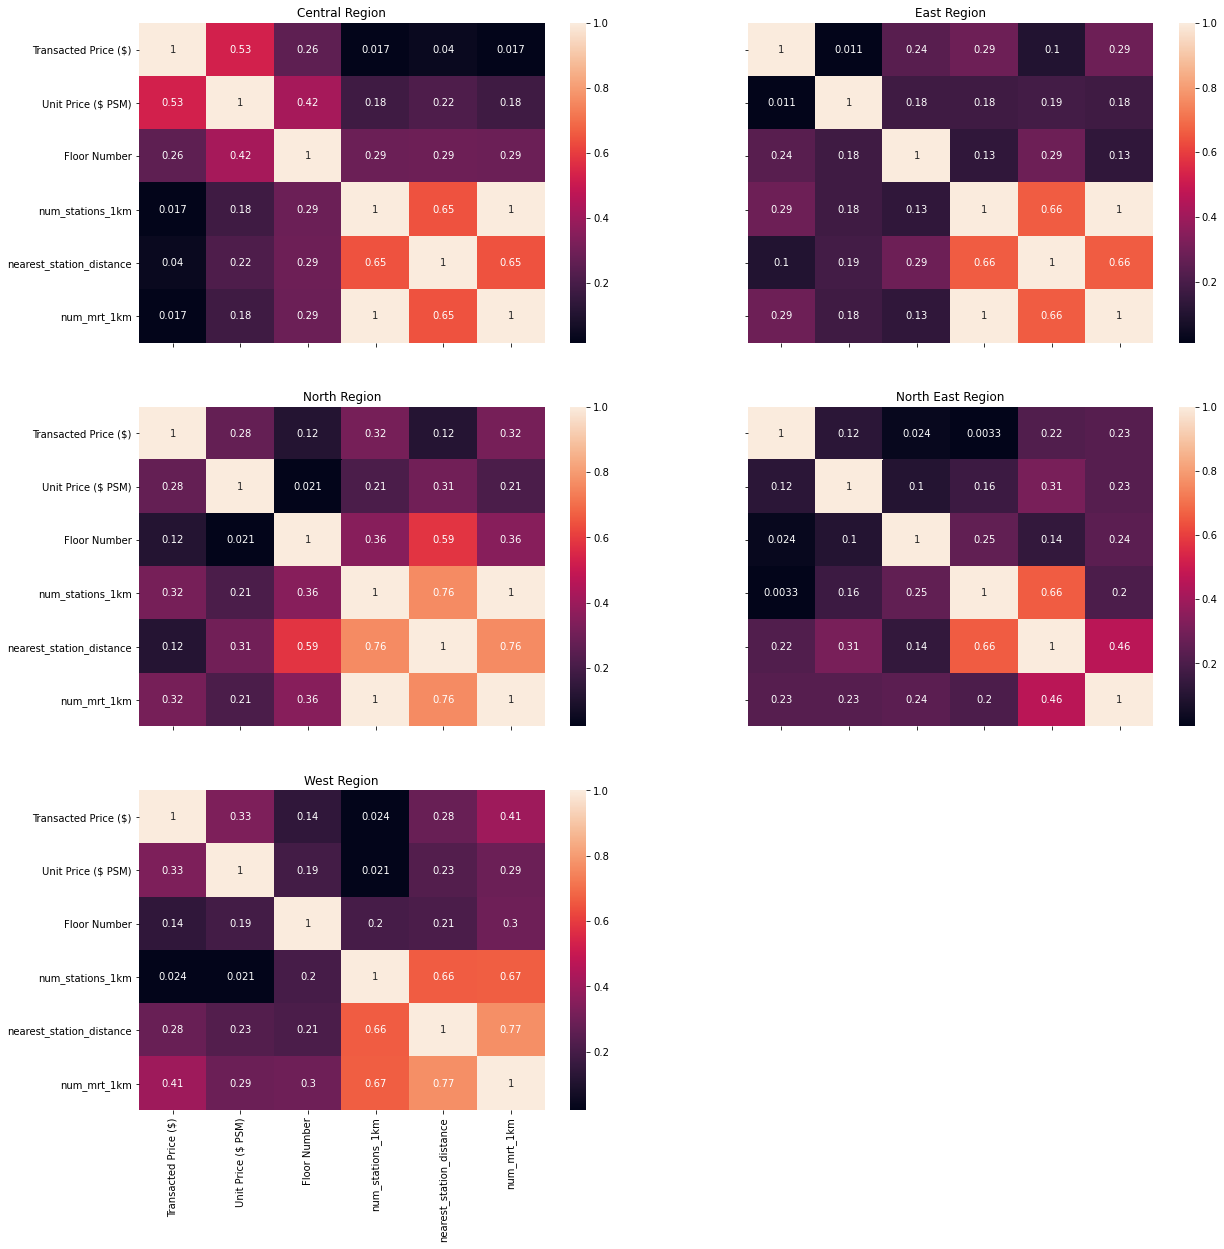

In [113]:
# Plotting correlation matrices for the different regions

fig, axs = plt.subplots(3, 2, figsize = (20,20), sharey = True, sharex = True)

corr_matrix('Central Region', axs, 0, 0)
corr_matrix('East Region', axs, 0, 1)
corr_matrix('North Region', axs, 1, 0)
corr_matrix('North East Region', axs, 1, 1)
corr_matrix('West Region', axs, 2, 0)

axs[0, 0].set_title('Central Region', fontdict = {'fontsize': 12})
axs[0, 1].set_title('East Region')
axs[1, 0].set_title('North Region')
axs[1, 1].set_title('North East Region')
axs[2, 0].set_title('West Region')
axs[2, 1].set_visible(False)

<AxesSubplot:xlabel='num_mrt_1km', ylabel='nearest_station_distance'>

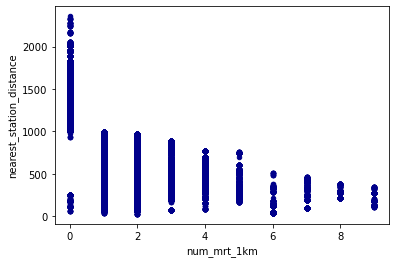

In [155]:
# Looking into possible multicollinaerity within variables nearest_station_distance and num_mrt_1km
data.plot.scatter(y='nearest_station_distance',
                  x='num_mrt_1km',
                  c='DarkBlue')

# Distance to nearest train station decreases as number of mrt stations within 1km increases

<AxesSubplot:xlabel='num_stations_1km', ylabel='nearest_station_distance'>

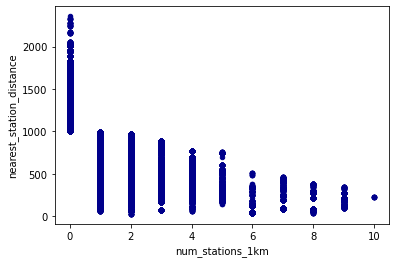

In [157]:
data.plot.scatter(y='nearest_station_distance',
                  x='num_stations_1km',
                  c='DarkBlue')

# The same pattern is observed for num_stations_1km since num_stations_1km = num_mrt_1km for stations without lrt

## Central Region

Central Region


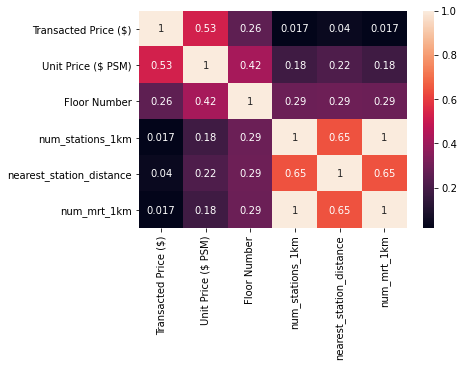

In [141]:
region_corr_matrix('Central Region')

# Train Stations does not seem to be any strong determinants for unit price or transacted price in the central region
# Distance to nearest train station seems to be the most important determinant

<AxesSubplot:title={'center':'Distribution of Distance to Nearest Station'}, ylabel='Frequency'>

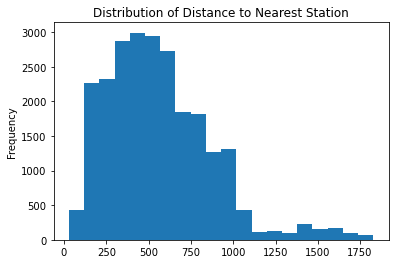

In [85]:
# Plotting distribution of Distance to Nearest Train Station
data[data['Planning Region'] == 'Central Region']['nearest_station_distance'].plot.hist(bins = 20, title = 'Distribution of Distance to Nearest Station')

<AxesSubplot:title={'center':'Distribution of Distance to Nearest Station'}>

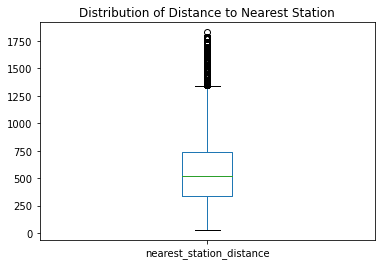

In [86]:
# Plotting boxplot
data[data['Planning Region'] == 'Central Region']['nearest_station_distance'].plot.box(title = 'Distribution of Distance to Nearest Station')

<AxesSubplot:xlabel='Floor Number', ylabel='Unit Price ($ PSM)'>

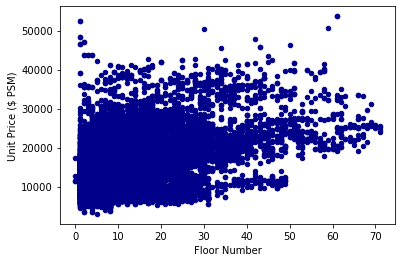

In [135]:
data[data['Planning Region'] == 'Central Region'].plot.scatter(x='Floor Number',
                                                               y='Unit Price ($ PSM)',
                                                               c='DarkBlue')

## East Region

East Region


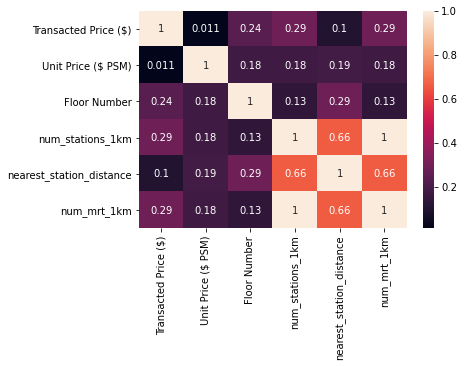

In [143]:
# Strength of correlation for features are even lower than that in the Central Region
# Peculiar correlation between unit price and transacted price
region_corr_matrix('East Region')

<AxesSubplot:xlabel='Unit Price ($ PSM)', ylabel='Transacted Price ($)'>

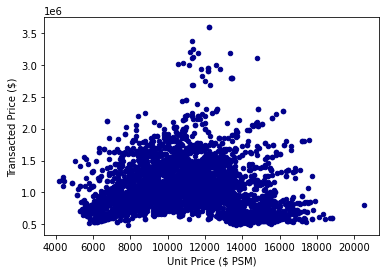

In [144]:
data[data['Planning Region'] == 'East Region'].plot.scatter(x='Unit Price ($ PSM)',
                                                            y='Transacted Price ($)',
                                                            c='DarkBlue')

<AxesSubplot:xlabel='Area (SQM)', ylabel='Unit Price ($ PSM)'>

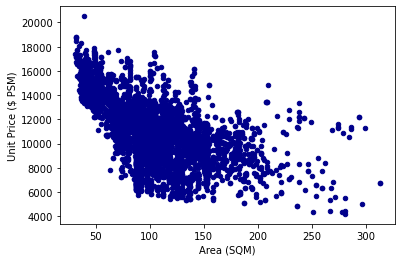

In [145]:
# It seems like smaller homes are pricier in terms of Unit Price ($ PSM)
data[data['Planning Region'] == 'East Region'].plot.scatter(y='Unit Price ($ PSM)',
                                                            x='Area (SQM)',
                                                            c='DarkBlue')

<AxesSubplot:xlabel='Age Sold', ylabel='Area (SQM)'>

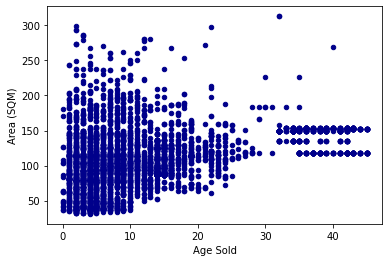

In [146]:
# There seems to be a greater distribution in size of property for younger properties
data[data['Planning Region'] == 'East Region'].plot.scatter(y='Area (SQM)',
                                                            x='Age Sold',
                                                            c='DarkBlue')

## North Region

North Region


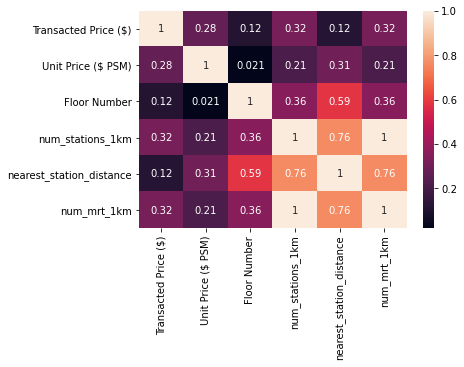

In [147]:
region_corr_matrix('North Region')

# Greater strength of correlation with features

<AxesSubplot:title={'center':'Distribution of Distance to Nearest Station'}, ylabel='Frequency'>

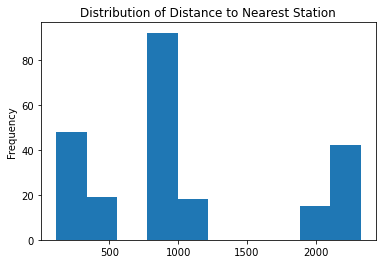

In [148]:
# Plotting distribution of Distance to Nearest Train Station
data[data['Planning Region'] == 'North Region']['nearest_station_distance'].plot.hist(bins = 10, title = 'Distribution of Distance to Nearest Station')

# Distribution seems very scattered as we have a very small sample for the North Region (234 out of 34959)
# Our model might not be very good in predicting prices of property in the North Region

# Properties in the north region have the lowest prices (by quite a large margin)
# Predictions might inflate the prices of property in the north 
# due to minority representation 
# and being on the lower end of prices

<AxesSubplot:title={'center':'Transacted Price ($)'}, xlabel='[Planning Region]'>

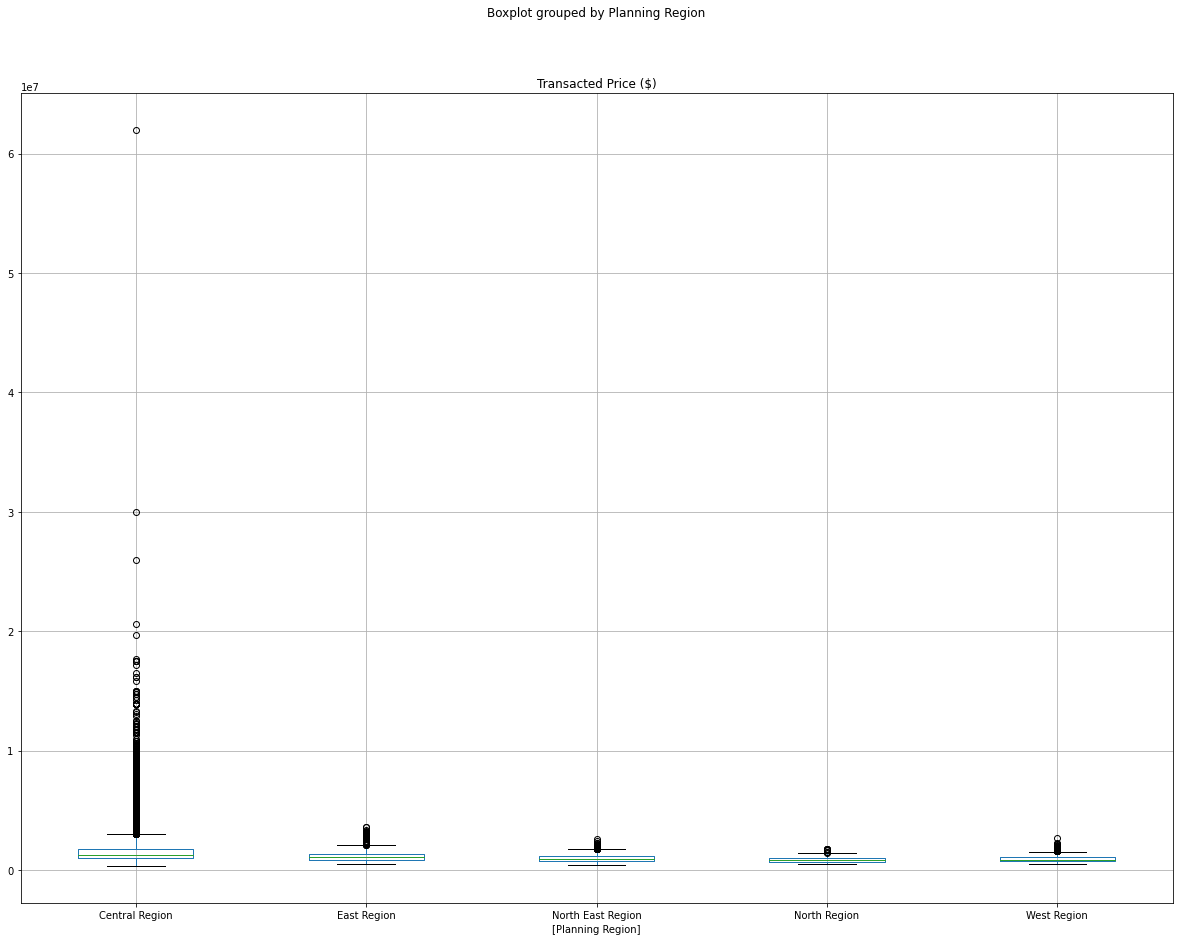

In [171]:
data.boxplot(column = 'Transacted Price ($)', by = ['Planning Region'], figsize = (20,15))

<AxesSubplot:title={'center':'Transacted Price ($)'}, xlabel='[Planning Region]'>

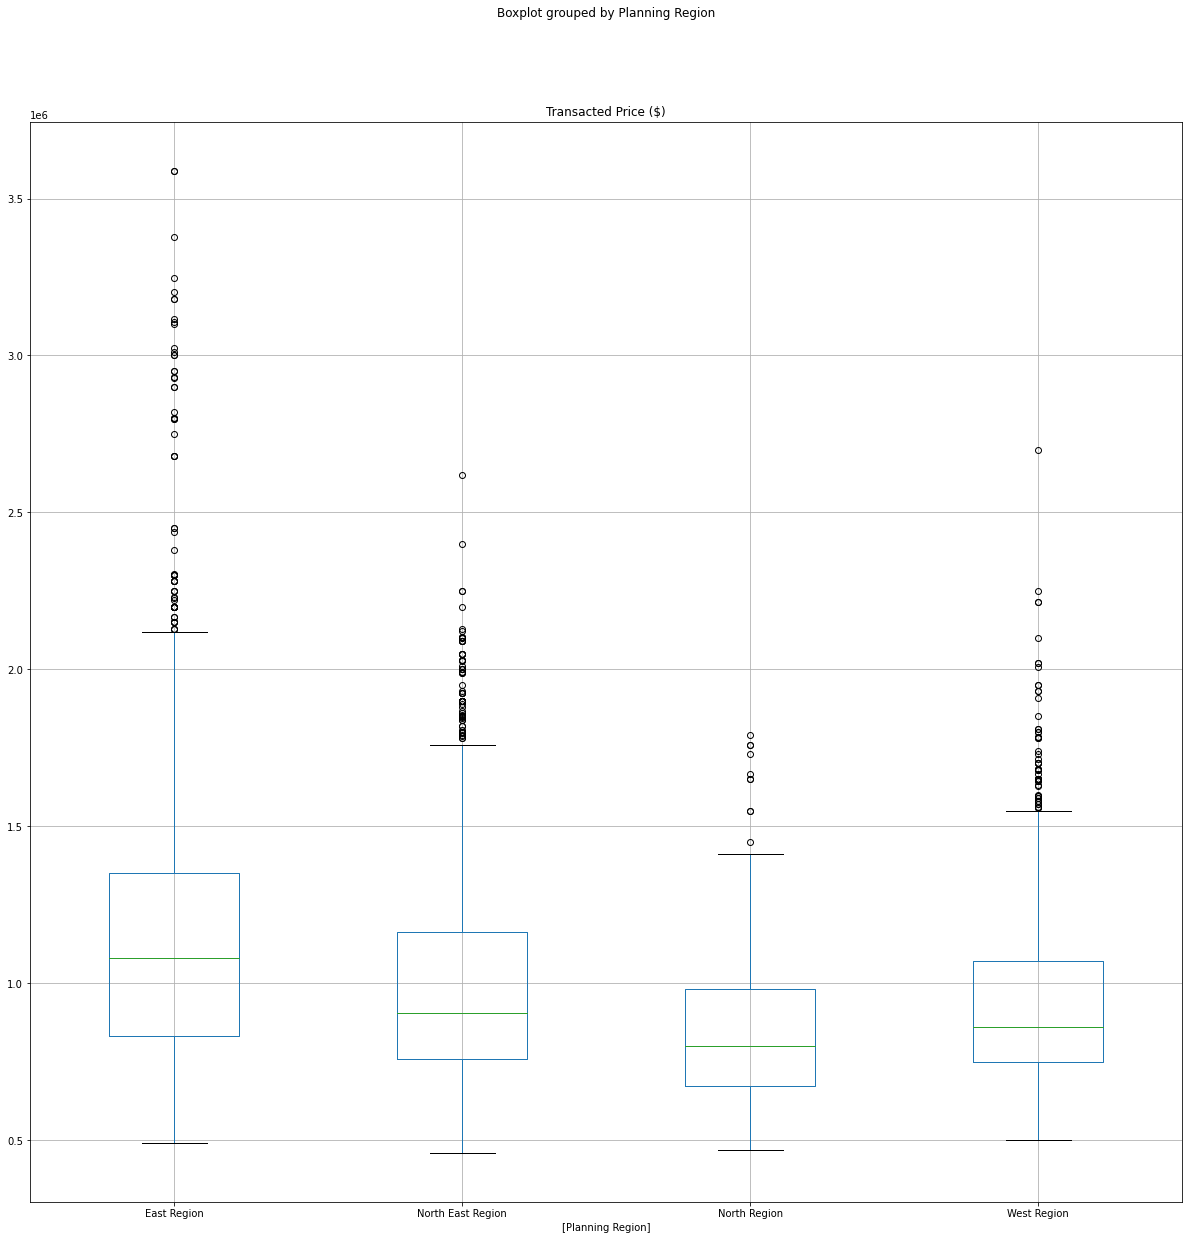

In [170]:
data[data['Planning Region'] != 'Central Region'].boxplot(column = 'Transacted Price ($)', by = ['Planning Region'], figsize = (20,20))

<AxesSubplot:title={'center':'Distribution of Distance to Nearest Station'}>

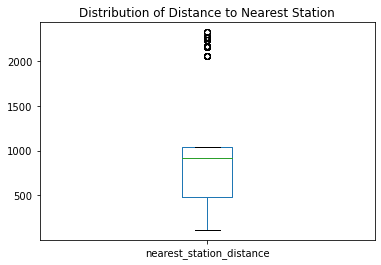

In [149]:
# Plotting boxplot
data[data['Planning Region'] == 'North Region']['nearest_station_distance'].plot.box(title = 'Distribution of Distance to Nearest Station')

# Most stations have below 1.5km distance to nearest train stations

<AxesSubplot:xlabel='nearest_station_distance', ylabel='Unit Price ($ PSM)'>

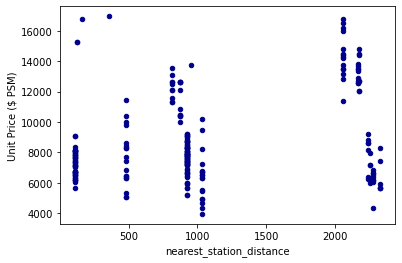

In [150]:
data[data['Planning Region'] == 'North Region'].plot.scatter(y='Unit Price ($ PSM)',
                                                               x='nearest_station_distance',
                                                               c='DarkBlue')

<AxesSubplot:xlabel='num_stations_1km', ylabel='Transacted Price ($)'>

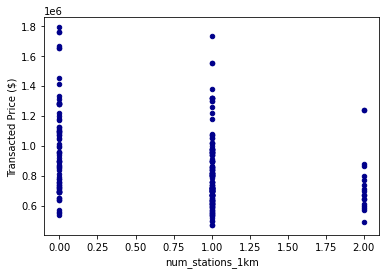

In [153]:
data[data['Planning Region'] == 'North Region'].plot.scatter(y='Transacted Price ($)',
                                                             x='num_stations_1km',
                                                             c='DarkBlue')

## North East Region

North East Region


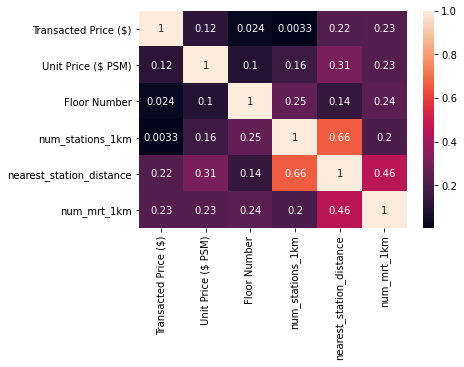

In [158]:
region_corr_matrix('North East Region')

<AxesSubplot:title={'center':'Distribution of Distance to Nearest Station'}, ylabel='Frequency'>

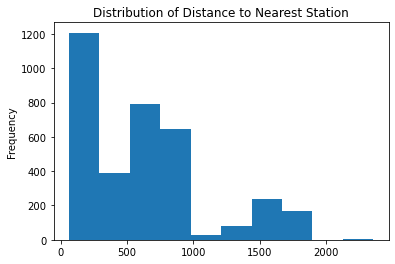

In [159]:
# Plotting distribution of Distance to Nearest Train Station
data[data['Planning Region'] == 'North East Region']['nearest_station_distance'].plot.hist(bins = 10, title = 'Distribution of Distance to Nearest Station')

<AxesSubplot:xlabel='nearest_station_distance', ylabel='Unit Price ($ PSM)'>

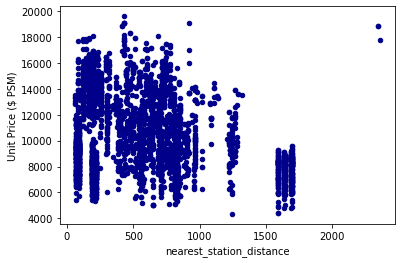

In [160]:
data[data['Planning Region'] == 'North East Region'].plot.scatter(y='Unit Price ($ PSM)',
                                                               x='nearest_station_distance',
                                                               c='DarkBlue')

# Listings that are far from train stations tend to fetch a lower price
# However, there is a large variation in price for listings close to train stations

# West Region

North East Region


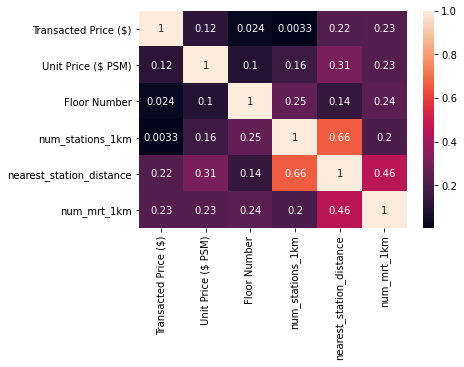

In [186]:
region_corr_matrix('North East Region')

In [ ]:
data['Remaining Lease']